In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

import pickle as pkl


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Flight_delay_prediction/Merged.csv',index_col = 0)

In [ ]:
data.head()

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016,1,1,1,2016-01-01,14747,SEA,12478,JFK,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016,1,1,1,2016-01-01,14747,SEA,14771,SFO,724,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
2,2016,1,1,1,2016-01-01,14747,SEA,12892,LAX,705,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
3,2016,1,1,1,2016-01-01,14747,SEA,12266,IAH,738,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
4,2016,1,1,1,2016-01-01,14747,SEA,10397,ATL,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA


In [ ]:
data.drop(columns=["FlightDate",
                 "OriginAirportID",
                 "DestAirportID",
                 "CRSArrTime",
                 "ArrTime",
                 "ArrDel15",
                 "New_time",
                 "date",
                  "airport_code"
                 ],
        inplace=True)

In [ ]:
labelEncoder = LabelEncoder()
data["Origin"] = labelEncoder.fit_transform(data["Origin"])
data["Dest"] = labelEncoder.fit_transform(data["Dest"])

In [ ]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'Origin', 'Dest',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15',
       'ArrDelayMinutes', 'windspeedKmph', 'winddirDegree', 'weatherCode',
       'precipMM', 'visibility', 'pressure', 'cloudcover', 'DewPointF',
       'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'time'],
      dtype='object')

In [ ]:
data[data['ArrDelayMinutes'] > 15]

,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
1,2016,1,1,1,13,14,724,759.0,35.0,1.0,...,0.0,10,1030,0,23,8,34,29,66,700
9,2016,1,1,1,13,7,705,745.0,40.0,1.0,...,0.0,10,1030,0,23,8,34,29,66,700
13,2016,1,1,2,13,8,655,720.0,25.0,1.0,...,0.0,10,1024,0,24,8,36,32,64,700
14,2016,1,1,2,13,8,730,730.0,0.0,0.0,...,0.0,10,1024,0,24,8,36,32,64,700
17,2016,1,1,2,13,0,745,745.0,0.0,0.0,...,0.0,10,1024,0,24,8,36,32,64,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840220,2017,4,12,3,5,3,2150,2220.0,30.0,1.0,...,2.0,9,1017,100,64,23,66,66,95,2200
1840230,2017,4,12,2,4,7,2015,2123.0,68.0,1.0,...,0.0,10,1024,77,35,7,43,43,73,2000
1840244,2017,4,12,18,4,8,1500,1705.0,125.0,1.0,...,0.0,10,1017,100,35,14,36,32,98,1500
1840264,2017,4,12,17,5,0,1959,709.0,670.0,1.0,...,0.0,10,1019,99,54,7,58,58,88,2000


In [ ]:
data['ArrDelayMinutes']

0           8.0
1          24.0
2           0.0
3          10.0
4           0.0
           ... 
1840272     0.0
1840273     0.0
1840274     0.0
1840275     0.0
1840276     0.0
Name: ArrDelayMinutes, Length: 1840277, dtype: float64

In [ ]:
data  = data[data['ArrDelayMinutes'] > 15]

In [ ]:
data.head()

,Year,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,DepDel15,...,precipMM,visibility,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,time
1,2016,1,1,1,13,14,724,759.0,35.0,1.0,...,0.0,10,1030,0,23,8,34,29,66,700
9,2016,1,1,1,13,7,705,745.0,40.0,1.0,...,0.0,10,1030,0,23,8,34,29,66,700
13,2016,1,1,2,13,8,655,720.0,25.0,1.0,...,0.0,10,1024,0,24,8,36,32,64,700
14,2016,1,1,2,13,8,730,730.0,0.0,0.0,...,0.0,10,1024,0,24,8,36,32,64,700
17,2016,1,1,2,13,0,745,745.0,0.0,0.0,...,0.0,10,1024,0,24,8,36,32,64,700


In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data['ArrDelayMinutes'].describe()

count    372405.000000
mean         64.560656
std          72.561821
min          16.000000
25%          25.000000
50%          41.000000
75%          77.000000
max        2142.000000
Name: ArrDelayMinutes, dtype: float64

In [ ]:
X = data.drop('ArrDelayMinutes', axis = 1)
y = data['ArrDelayMinutes']


In [ ]:
mae_l = []
mse_l = []
rmse_l = []
r2_l = []
def Metrics(ytest, ypred):
    mae = mean_absolute_error(ytest, ypred)
    mse = mean_squared_error(ytest, ypred)
    rmse = mse ** 0.5
    r2 = r2_score(ytest, ypred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    r2_l.append(r2)
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R-Squared: ", r2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [ ]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
print('Linear Regression : ')
Metrics(y_test, y_pred)

Linear Regression : 
MAE:  12.381633485705672
MSE:  319.4995980280325
RMSE:  17.874551687469886
R-Squared:  0.9388622250753023


In [ ]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
y_pred = decision_tree_regressor.predict(X_test)
print('Decision Tree Regressor : ')
Metrics(y_test, y_pred)

Decision Tree Regressor : 
MAE:  16.839413902364797
MSE:  599.0039741501226
RMSE:  24.474557690592135
R-Squared:  0.8853777269936455


In [ ]:
XGB_regressor = XGBRegressor()
XGB_regressor.fit(X_train, y_train)
y_pred = XGB_regressor.predict(X_test)
print('XGBoost Regressor Results')
Metrics(y_test, y_pred)

XGBoost Regressor Results
MAE:  11.39446251879906
MSE:  271.47110226768814
RMSE:  16.476380132410398
R-Squared:  0.9480527072602285


In [ ]:
extra_tree_regressor = ExtraTreesRegressor(n_jobs =-1)
extra_tree_regressor.fit(X_train, y_train)
y_pred = extra_tree_regressor.predict(X_test)
print('Extra Tree Regressor Results')
Metrics(y_test, y_pred)

Extra Tree Regressor Results
MAE:  12.074776409301661
MSE:  295.69716755428647
RMSE:  17.19584739273661
R-Squared:  0.9434169338948012


In [ ]:
random_forest_regressor = RandomForestRegressor(n_jobs = -1)
random_forest_regressor.fit(X_train, y_train)
y_pred = random_forest_regressor.predict(X_test)
print('Random Forest Regressor Results')
Metrics(y_test, y_pred)

Random Forest Regressor Results
MAE:  11.975524883831548
MSE:  291.17717003511245
RMSE:  17.063914264760957
R-Squared:  0.9442818570205048


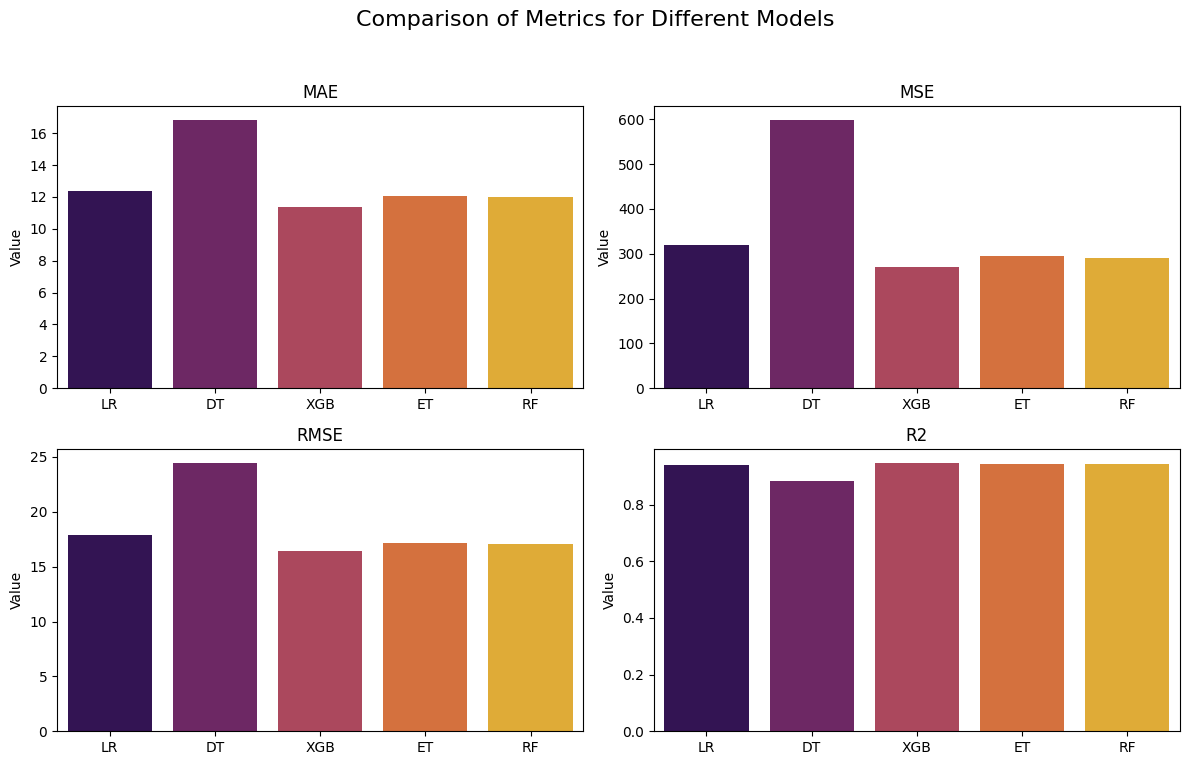

In [ ]:

models = ['LR', 'DT','XGB','ET', 'RF']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparison of Metrics for Different Models', fontsize=16)
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

for i, metric in enumerate(metrics):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    if metric == 'MAE':
        values = mae_l
    elif metric == 'MSE':
        values = mse_l
    elif metric == 'RMSE':
        values = rmse_l
    elif metric == 'R2':
        values = r2_l

    sns.barplot(x=models, y=values, ax=ax, palette='inferno')
    ax.set_title(metric)
    ax.set_ylabel('Value')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

saving the best performing regressor

In [ ]:
import pickle
with open('/content/drive/MyDrive/Flight_delay_prediction/XGB_regressor.pkl', 'wb') as file:
  pickle.dump(XGB_regressor,file)